## KNN Approach



### Setup

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


In [11]:
# read dynamic path
base_dir = Path(os.getcwd())/"implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [12]:
nn_data_raw_train = pd.read_csv(data_dir / "COX1/cox1_smote_train.csv")
nn_data_raw_test = pd.read_csv(data_dir / "COX1/cox1_smote_test.csv")

In [13]:
nn_data_train = {'data': np.array(nn_data_raw_train.iloc[:, 2:-1]),
             'target': np.array(nn_data_raw_train.iloc[0:,-1]),
             'feature_names': nn_data_raw_train.columns[2:-1],
             'target_names': ['inactive', 'active']}

nn_data_test = {'data': np.array(nn_data_raw_test.iloc[:, 2:-1]),
             'target': np.array(nn_data_raw_test.iloc[0:,-1]),
             'feature_names': nn_data_raw_test.columns[2:-1],
             'target_names': ['inactive', 'active']}



### train and apply neural network

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data_train['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 209       
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
37/37 - 3s - loss: 0.6433 - accuracy: 0.6517 - val_loss: 0.6276 - val_accuracy: 0.6918 - 3s/epoch - 74ms/step
Epoch 2/150
37/37 - 1s - loss: 0.6101 - accuracy: 0.6948 - val_loss: 0.6076 - val_accuracy: 0.7329 - 805ms/epoch - 22ms/step
Epoch 3/150
37/37 - 1s - loss: 0.5954 - accuracy: 0.7138 - val_loss: 0.5980 - val_accuracy: 0.7260 - 728ms/epoch - 20ms/step
Epoch 4/150
37/37 - 1s - loss: 0.5876 - accuracy: 0.7207 - val_loss: 0.5938 - val_accuracy: 0.7192 - 726ms/epoch - 20ms/step
Epoch 5/150
37/37 - 1s - loss: 0.5825 - accuracy: 0.7172 - val_loss: 0.5903 - val_accuracy: 0.7192 - 718ms/epoch - 19ms/step
Epoch 6/150
37/37 - 1s - loss: 0.5780 - accuracy: 0.7155 - val_loss: 0.5899 - val_accuracy: 0.7192 - 728ms/epoch - 20ms/step
Epoch 7/150
37/37 - 1s - loss: 0.5746 - accuracy: 0.7172 - val_loss: 0.5878 - val_accuracy: 0.7192 - 858ms/epoch - 23ms/step
Epoch 8/150
37/37 - 1s - loss: 0.5699 - accuracy: 0.7155 - val_loss: 0.5870 - val_accuracy: 0.7192 - 731ms/epoch - 20ms/step
Epo

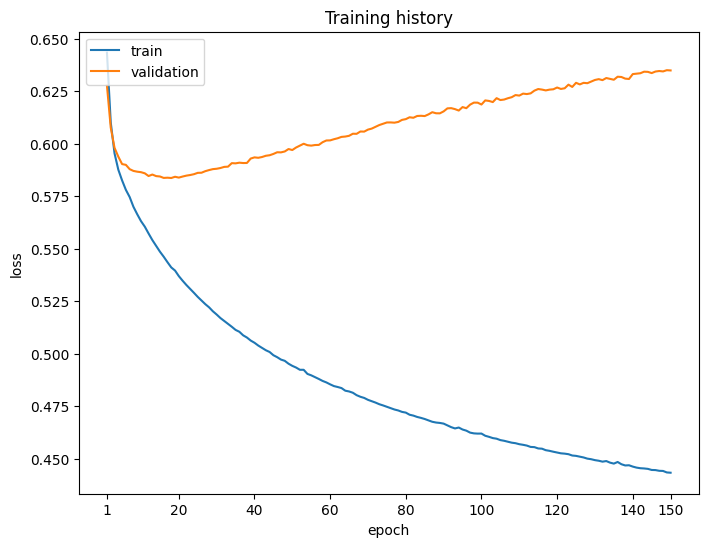

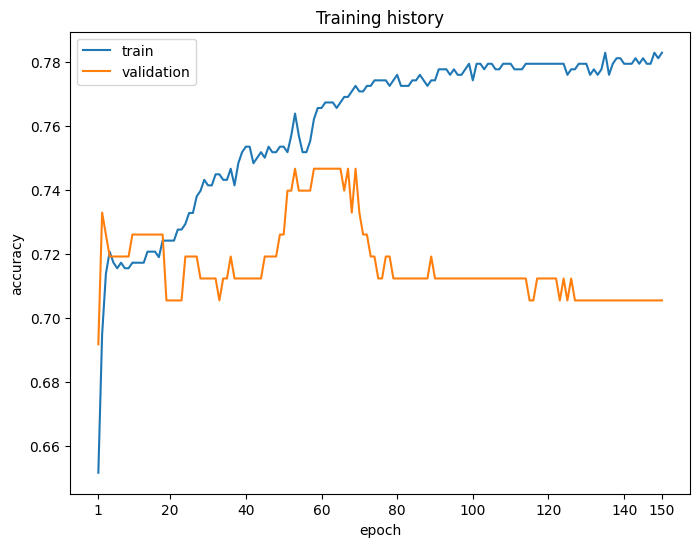

In [15]:
history = model.fit(x=nn_data_train["data"], y=nn_data_train["target"], epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [16]:
pred = model.predict(nn_data_test["data"])
classes= [1 if i > 0.5  else 0 for i in pred]


10/10 [==============================] - 0s 2ms/step


### Prepare Data for evaluation

In [17]:
result_df = pd.DataFrame(columns=nn_data_raw_train.columns[:-1])

for i, row in enumerate(nn_data_test["data"]):
    data = [i,i]
    data.extend(row)
    result_df.loc[i+1] = data

result_df["LABEL"] = nn_data_test["target"]
result_df["PRED"] = classes

result_df.to_csv(result_dir / "COX1/fe_smote_nn.csv", encoding="utf-8")